Q1) Load the dataset into a pandas dataframe and display the first 5 lines of the dataset along with the column headings.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

#Loading the dataset 
dataset = pd.read_csv('data.csv')
dataset.head(n=5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Q2) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4.

In [2]:
dataset.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Q3) Create histograms of columns age and income to visually explore their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001375FC0E3C8>]],
      dtype=object)

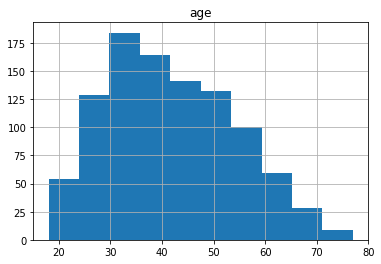

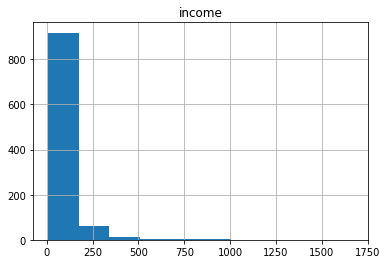

In [3]:
dataset.hist(column = 'age')
dataset.hist(column = 'income')

Q5) Split the dataset into training (80%) and testing set (20%). 

In [4]:
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,11].values

#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Q4) Perform normalization of the data using standardization.

In [5]:
#Normalizing the features 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

Q6) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?

In [6]:
#Fitting Logistic Regression to Training Set 
from sklearn.linear_model import LogisticRegression 
classifierObj = LogisticRegression(random_state=0) 
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate


0.605

Q7) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN with different values of k and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?

[0.775, 0.74, 0.7150000000000001, 0.7, 0.69, 0.69, 0.665, 0.6599999999999999, 0.665, 0.645, 0.655, 0.655, 0.665, 0.6699999999999999, 0.6699999999999999, 0.675, 0.675, 0.7050000000000001, 0.71, 0.6950000000000001, 0.7050000000000001, 0.69, 0.6799999999999999, 0.675, 0.69]


Text(0,0.5,'Testing Error')

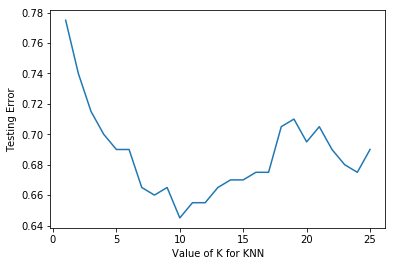

In [7]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
error_rates = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    error_rates.append(1-accuracy)

print(error_rates)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, error_rates)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')


.645 k = 10

Q8) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?

In [8]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

classifierObj = SVC(kernel='linear') 
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred)
error_rate_linear = 1 - accuracy_linear
print('error_rate_linear: ' + str(error_rate_linear))
#########################################################
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj 
classifierObj = SVC(kernel='poly', degree=3) 
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred)
error_rate_poly = 1 - accuracy_poly
print('error_rate_poly: ' + str(error_rate_poly))
#########################################################
classifierObj = SVC(kernel='sigmoid') 
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)
                    
accuracy_sigmoid = accuracy_score(y_test, y_pred)
error_rate_sigmoid = 1 - accuracy_sigmoid
print('error_rate_sigmoid: ' + str(error_rate_sigmoid))
#the linear kernel has the least testing error

error_rate_linear: 0.61
error_rate_poly: 0.63
error_rate_sigmoid: 0.665


Q9) Model 4: Fit Naïve Bayes model. What is the testing error you get? 

In [9]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj 
from sklearn.naive_bayes import GaussianNB 
classifierObj = GaussianNB() 
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set 
y_pred = classifierObj.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate

0.6

Q10) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest with different values of n_estimators and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators

C:\Users\pcrosswait.ATEK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.72, 0.64, 0.6699999999999999, 0.7050000000000001, 0.65, 0.635, 0.645, 0.69, 0.615, 0.6799999999999999, 0.6599999999999999, 0.635, 0.665, 0.625, 0.62, 0.62, 0.6799999999999999, 0.665, 0.645, 0.625, 0.6699999999999999, 0.655, 0.615, 0.655, 0.64, 0.655, 0.645, 0.64, 0.665]
range(1, 30)


Text(0,0.5,'Testing Error')

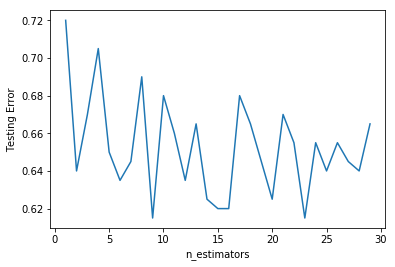

In [10]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj 
from sklearn.ensemble import RandomForestClassifier 
# try K=1 through K=25 and record testing accuracy
n_range = range(1, 30)

# We can create Python dictionary using [] or dict()
error_rates_randomforest = []

# We use a loop through the range 1 to 30
# We append the scores in the dictionary
for n in n_range:
    classifierObj = RandomForestClassifier(n_estimators=n, criterion='entropy') 
    classifierObj.fit(X_train, y_train)
    y_pred = classifierObj.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    error_rates_randomforest.append(1-accuracy)

print(error_rates_randomforest)
print(n_range)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(n_range, error_rates_randomforest)
plt.xlabel('n_estimators')
plt.ylabel('Testing Error')

n_estimator = 4, testing error = .605

Q11) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model?

In [ ]:
i = len(X_test)
j=0
while (j<i):

    #Logistic
    classifierObj = LogisticRegression(random_state=0)
    classifierObj.fit(X_train, y_train)
    #Making preditions on the Test Set
    Log_pred= classifierObj.predict(X_test)

    #Fitting kNN to Training Set
    classifierObj = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
    classifierObj.fit(X_train, y_train)
    #Making preditions on the Test Set
    knn_pred= classifierObj.predict(X_test)

    #Fitting SVC to Training Set
    classifierObj = SVC(kernel='linear')
    classifierObj.fit(X_train, y_train)
    #Making preditions on the Test Set
    sc_pred= classifierObj.predict(X_test)

    #Fitting Naive Bayes to Training Set
    classifierObj= GaussianNB()
    classifierObj.fit(X_train, y_train)
    #Making preditions on the Test Set
    n_pred= classifierObj.predict(X_test)

    #Fitting Random Forest to Training Set
    classifierObj= RandomForestClassifier(n_estimators=8, criterion='entropy')
    classifierObj.fit(X_train,y_train)
    #Making preditions on the Test Set
    rf_pred= classifierObj.predict(X_test)

#List of every model's predictions
predictions = (Log_pred, knn_pred, sc_pred, n_pred, rf_pred)

#Find most common prediction
mode = max(set(predictions, key=predictions.count))

#Appending most common prediction
ensemble_predictions.append(mode)

#Confusion matrix
cm(y_test, ensemble_predictions)
cm